In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
data = np.array([
    [0.000103, 0.000846, 0.017366, 0.181574],
    [0.000555, 0.006125, 0.044396, 0.413093],
    [0.000518, 0.005058, 0.043199, 0.374945],
    [0.000029, 0.001715, 0.003285, 0.035864],
    [0.001772, 0.025511, 1.492746, 5.599526]
])

labels = [
    "MLX",
    "Tyxml",
    "Tyxml percent",
    "Dream html",
    "Dream eml"
]

volumes = np.array([
    [100, 1000, 10000, 100000],
    [100, 1000, 10000, 100000],
    [100, 1000, 10000, 100000],
    [100, 1000, 10000, 100000],
    [100, 1000, 10000, 20000]
])

colors = ['b', 'g', 'r', 'c', 'm']

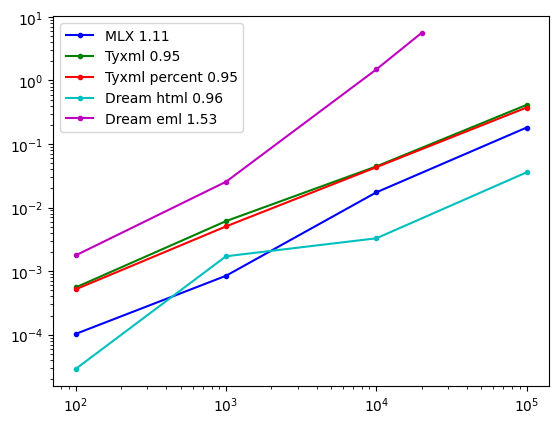

In [32]:
def graph_perfomance(data, labels, volumes, colors):
    plt.yscale('log')
    plt.xscale('log')
    for i in range(0, 5):
        k, _ = np.polyfit(np.log(volumes[i]), np.log(data[i]), deg=1)
        plt.plot(volumes[i], data[i], marker=".", color=colors[i], label=f'{labels[i]} {k:.2f}')
    plt.legend()
    plt.savefig('perfomance.png')
    plt.show()

graph_perfomance(data, labels, volumes, colors)